https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
# 10 neuronas de salida con sigmoidea (clasificacion) aquí se trabaja con posiciones
y_pred = [0.1, 0, 0, 0.2, 0.7, 0, 0, 0, 0, 0]  # One-Hot encoder
y_real = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [34]:
# 1 neurona de salida (clasificacion) aqui no se trabaja con posisciones, sino con lo que tú le digas
y_pred = 2
y_real = 4

In [35]:
# 1 neurona de salida( regresion), si  nuestra neurona ha sacado un valor de "2" y realmente era esto "4", tenemos un error que podemos medir

y_pred = 2
y_real = 4

Ejemplo: si yo tengo 10 digitos diferentes, clases, ¿como le digo a la red neuronal que me saque la probabilidad de qué sea cada uno de los digitos? Si tenemos 10 clases, podemos hacer que la capa de salida tenga 10 neuronas y cada una de ella como tiene la funcion signoide, cada una de ella va dar la probabilidad de que sea una clase  diferente. Lo que nos va decir es la fiabilidad de que sea esa clase. 



### Softmax

Función de activación cuya salida es un array con valores entre el rango [[0, 1]] y cuya suma total debe ser 1.


In [36]:
# Construimos el modelo

# Las entradas van a tener 784 dimensiones en forma de vector (28x28)
inputs = keras.Input(shape=(784,), name="digits")
# Primera capa de la red, con 64 neuronas y usando ReLu
x1 = layers.Dense(64, activation="relu")(inputs)
# Segunda capa de la red, con 64 neuronas y usando ReLu
x2 = layers.Dense(32, activation="relu")(x1)
# La salida de la red con 10 neuronas porque estamos usando un algoritmo de clasificación de 10
# Softmax 
outputs = layers.Dense(10, activation="softmax", name="predictions")(x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
# Ejemplo de otra creación de capas (NO EJECUTAR)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    #layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation="softmax")
  ])

In [38]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
# Normalizamos la imagen dividiéndola por 255 y transformándola a imagen 28x28
to_show = (x_train[0]/255).reshape(28,28)
to_show

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

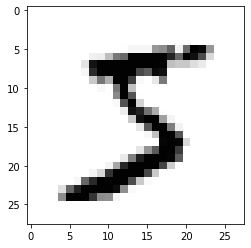

In [40]:
import matplotlib.pyplot as plt

plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [41]:
y_train.shape

(60000,)

In [42]:
y_train[0]

5

In [43]:
# Preprocess the data (these are NumPy arrays)
#estamos aplanando las imagenes, normalizando
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [44]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [45]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/15
782/782 [==============================] - 2s 2ms/step - loss: 0.3788 - sparse_categorical_accuracy: 0.8941 - val_loss: 0.1971 - val_sparse_categorical_accuracy: 0.9440
Epoch 2/15
782/782 [==============================] - 1s 2ms/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9456 - val_loss: 0.1530 - val_sparse_categorical_accuracy: 0.9559
Epoch 3/15
782/782 [==============================] - 1s 2ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.1254 - val_sparse_categorical_accuracy: 0.9634
Epoch 4/15
782/782 [==============================] - 1s 2ms/step - loss: 0.1121 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.1261 - val_sparse_categorical_accuracy: 0.9639
Epoch 5/15
782/782 [==============================] - 1s 2ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9723 - val_loss: 0.1152 - val_sparse_categorical_accuracy: 0.9667
Epoch 6/15
782/782 [==============================] - 1s 2ms/step - loss:

In [47]:
# Podemos ver el histórico que ha ocurrido cogiendo el mejor de cada epoch
history.history

{'loss': [0.37880268692970276,
  0.18359960615634918,
  0.1370423287153244,
  0.11205428093671799,
  0.09380524605512619,
  0.07949286699295044,
  0.06876973062753677,
  0.06222967803478241,
  0.05472578480839729,
  0.04858602210879326,
  0.043239492923021317,
  0.039039246737957,
  0.03568105399608612,
  0.03206370770931244,
  0.027989951893687248],
 'sparse_categorical_accuracy': [0.8940799832344055,
  0.9456400275230408,
  0.9597200155258179,
  0.966480016708374,
  0.9722999930381775,
  0.9761599898338318,
  0.9796800017356873,
  0.9821000099182129,
  0.9836000204086304,
  0.9859399795532227,
  0.9878000020980835,
  0.9886800050735474,
  0.9893400073051453,
  0.9907199740409851,
  0.9916200041770935],
 'val_loss': [0.19706298410892487,
  0.15298017859458923,
  0.12540054321289062,
  0.1261056512594223,
  0.11520366370677948,
  0.10803589224815369,
  0.09825033694505692,
  0.10302933305501938,
  0.09699982404708862,
  0.11083641648292542,
  0.10421529412269592,
  0.10453085601329803,

In [48]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 1ms/step - loss: 0.1075 - sparse_categorical_accuracy: 0.9734
test loss, test acc: [0.10754101723432541, 0.9733999967575073]


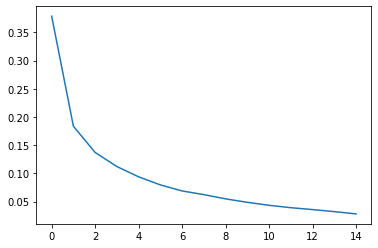

In [49]:
plt.plot(history.history["loss"])

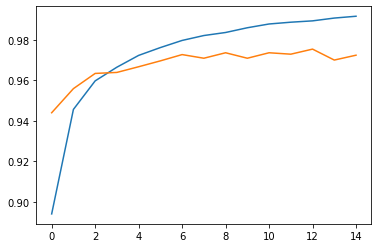

In [50]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

In [51]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:1])
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 10)


array([[1.0523430e-11, 6.8284615e-16, 1.1822145e-07, 7.1706352e-05,
        1.7062876e-15, 9.2089397e-10, 1.6531899e-17, 9.9992681e-01,
        3.1085894e-09, 1.2750019e-06]], dtype=float32)

In [52]:
predictions.max()

0.9999268

In [53]:
predictions.argmax()

7

In [54]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
for i,image_predicted in enumerate(predictions):
    print("Image",i,":", image_predicted.argmax())
    #plt.imshow(x_test[2:3].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))

Generate predictions for 3 samples
predictions shape: (3, 10)
Image 0 : 7
Image 1 : 2
Image 2 : 1


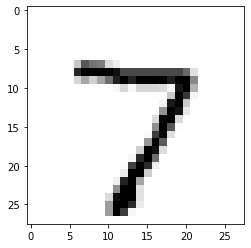

In [55]:
to_show = (x_test[0]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

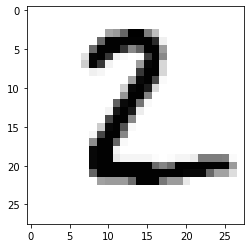

In [56]:
to_show = (x_test[1]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

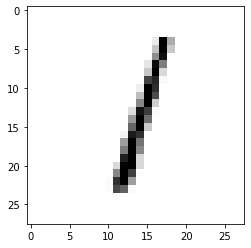

In [57]:
to_show = (x_test[2]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [58]:
model.save("my_keras_model.h5")
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")